# Convolutional Neural Network

### Load Libraries and Dataset

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Hp\OneDrive\Minor Project\archive (1)\TrainingData.csv'  
dataset = pd.read_csv(file_path)
dataset.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


###  Preprocessing: Splitting the Dataset into Train and Test Data

In [4]:
X = dataset.iloc[:, :520]  # WAP columns
y = dataset[['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID']]  # Target labels

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### CNN Model Definition

In [5]:
model = models.Sequential([
    layers.InputLayer(input_shape=(520, 1)),  # Reshaping the input for CNN
    layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(4)  # Output layer for LONGITUDE, LATITUDE, FLOOR, BUILDINGID
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Reshape input data for CNN
X_train_reshaped = X_train.values.reshape(-1, 520, 1)
X_test_reshaped = X_test.values.reshape(-1, 520, 1)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 55s 107ms/step - loss: 1536512491520.0000 - mae: 366127.1562 - val_loss: 278970048.0000 - val_mae: 7440.5181
Epoch 2/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 53s 106ms/step - loss: 224963200.0000 - mae: 6179.3164 - val_loss: 140525296.0000 - val_mae: 5000.2139
Epoch 3/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 53s 106ms/step - loss: 123950584.0000 - mae: 4482.2329 - val_loss: 94760280.0000 - val_mae: 3937.1074
Epoch 4/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 53s 106ms/step - loss: 87571736.0000 - mae: 3816.2292 - val_loss: 68031392.0000 - val_mae: 3348.4282
Epoch 5/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 54s 107ms/step - loss: 62626848.0000 - mae: 3334.5022 - val_loss: 49982072.0000 - val_mae: 2771.1262
Epoch 6/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 55s 109ms/step - loss: 44764264.0000 - mae: 2797.1724 - val_loss: 38589804.0000 - val_mae: 2777.5847
Epoch 7/10
499/499 ━━━━━━━━━━━━━━━━━━━━ 53s 105ms/step - loss: 34809000.0000 - mae: 2609.4895 - val_loss: 28396614.0000 - val_mae: 2260.9500
Ep

### Plot the training history (Loss and MAE)

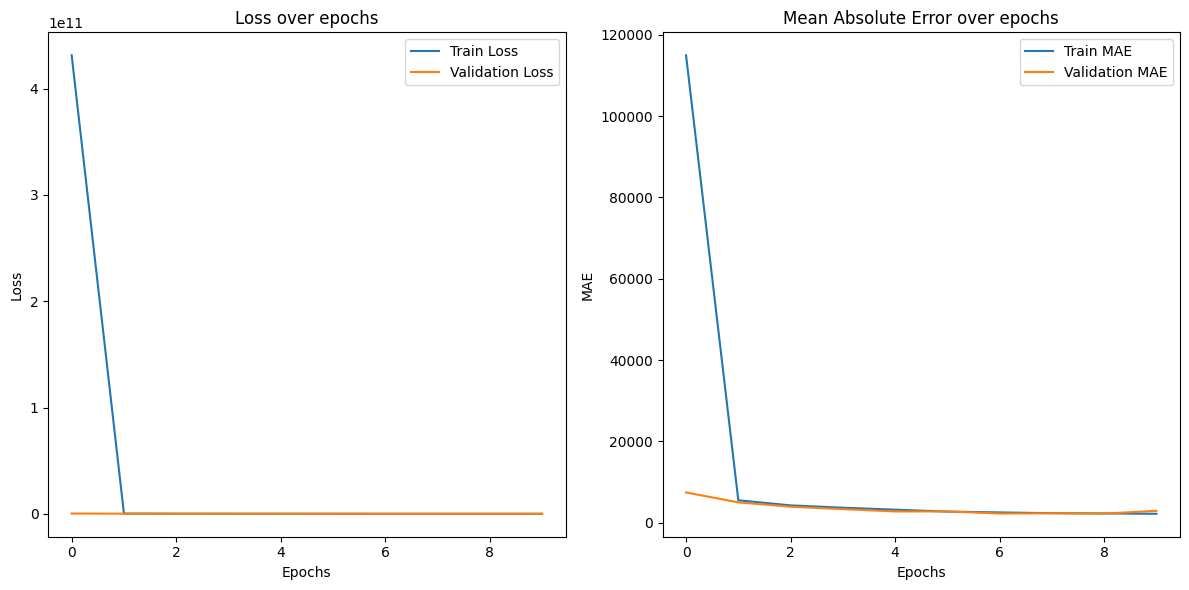

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error over epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Evaluation and Metrics
loss, mae = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 20512118.0000 - mae: 2932.4868
Test Loss: 20065560.0
Test MAE: 2928.48046875


### Evaluation Matrices

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 20512118.0000 - mae: 2932.4868
Test Loss: 20065560.0
Test MAE: 2928.48046875


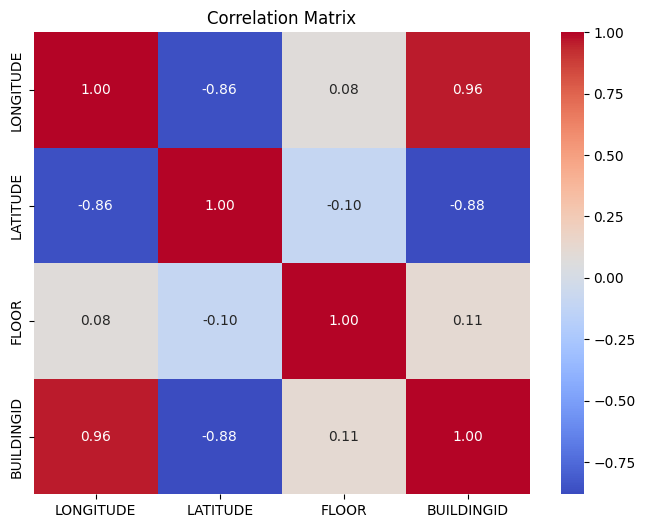

In [17]:
# Evaluation and Metrics
loss, mae = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Correlation Matrix
corr = dataset[['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

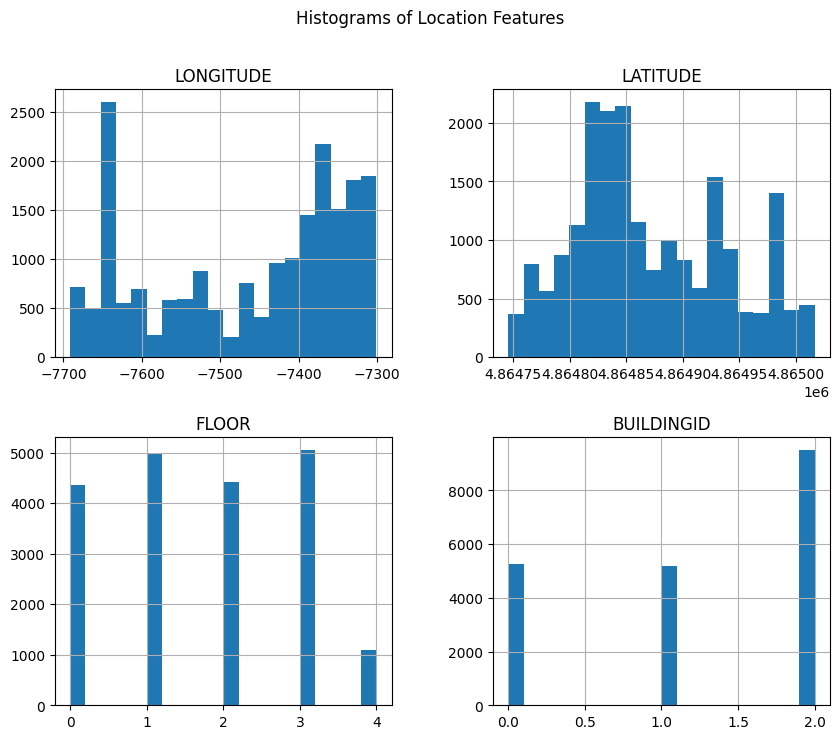

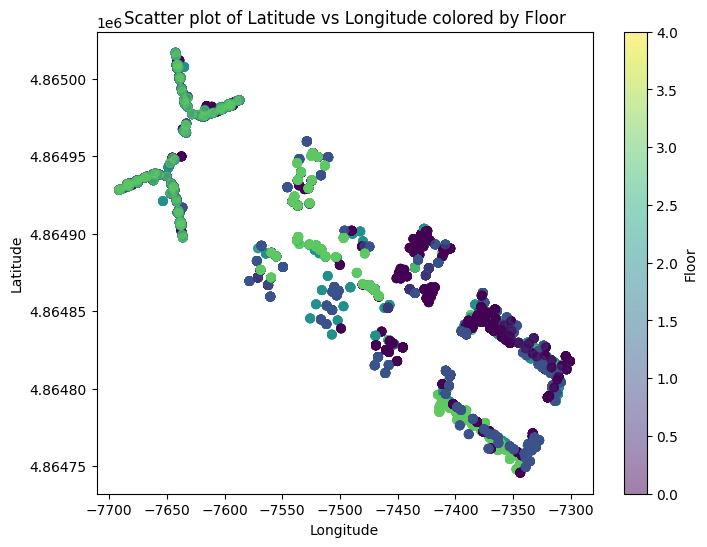

In [19]:
# Histograms
dataset[['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Location Features')
plt.show()

# Scatter Plot (Latitude vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(dataset['LONGITUDE'], dataset['LATITUDE'], alpha=0.5, c=dataset['FLOOR'], cmap='viridis')
plt.colorbar(label='Floor')
plt.title('Scatter plot of Latitude vs Longitude colored by Floor')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()